# Feature scaling with sklearn - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. This exercise is very similar to a previous one. This time, however, **please standardize the data**.

Apart from that, please:
-  Display the intercept and coefficient(s)
-  Find the R-squared and Adjusted R-squared
-  Compare the R-squared and the Adjusted R-squared
-  Compare the R-squared of this regression and the simple linear regression where only 'size' was used
-  Using the model make a prediction about an apartment with size 750 sq.ft. from 2009
-  Find the univariate (or multivariate if you wish - see the article) p-values of the two variables. What can you say about them?
-  Create a summary table with your findings

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
data = pd.read_csv( 'real_estate_price_size_year.csv')
data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
5,245050.280,575.19,2006
6,265129.064,570.89,2015
7,175716.480,620.82,2006
8,331101.344,682.26,2018
9,218630.608,694.52,2009


In [3]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [4]:
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


## Create the regression

### Declare the dependent and the independent variables

In [5]:
x = data[["size","year"]]
y = data["price"]
x1 = data["size"]

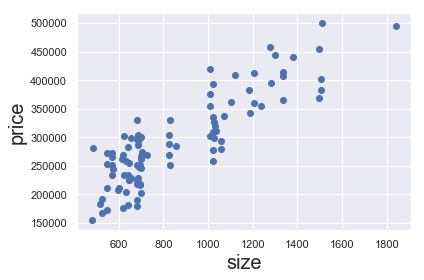

In [6]:
plt.scatter(x1,y)
plt.xlabel("size", fontsize =20)
plt.ylabel("price", fontsize =20)
plt.show()

### Scale the inputs

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### Regression

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(x_scaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Find the intercept

In [11]:
reg.intercept_

292289.4701599997

# Find the coefficients

In [12]:
reg.coef_

array([67501.57614152, 13724.39708231])

### Calculate the R-squared

In [13]:
reg.score(x_scaled,y)

0.7764803683276793

### Calculate the Adjusted R-squared

In [14]:
def adjustedR (x,y):
    r2 = reg.score(x_scaled,y)
    n = x.shape[0]
    p = x.shape[1]
    R2 = 1-(1-r2)*(n-1)/(n-p-1)
    return R2


In [15]:
adjustedR(x,y)

0.77187171612825

### Compare the R-squared and the Adjusted R-squared

Answer... The R-square is 0.7764803683276793 which is largerly  than the Adjusted R-square 0.77187171612825,
implying the inclusion of the two independent variables "size" and "year" has no much difference.

### Compare the Adjusted R-squared with the R-squared of the simple linear regression

Answer..
using the R-squared for the linear regression which "size"is only used as the independent variable and 
AdjustedR which is used for the multiple linear regression where both "size" and "year" were used as no much significant.

### Making predictions

Find the predicted price of an apartment that has a size of 750 sq.ft. from 2009.

In [16]:
new_data =[[750,2009]]

In [17]:
new_d_data = scaler.transform(new_data)
new_d_data

array([[-0.34752816, -0.76509206]])

In [18]:
reg.predict(new_d_data)

array([258330.34465995])

### Calculate the univariate p-values of the variables

In [19]:
from sklearn.feature_selection import f_regression

In [21]:
f_regression(x_scaled,y)

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [22]:
p_values = f_regression(x_scaled,y)[1]
p_values

array([8.12763222e-31, 3.57340758e-01])

In [23]:
p_values.round(3)

array([0.   , 0.357])

### Create a summary table with your findings

In [24]:
new_table = pd.DataFrame(data= x.columns.values, columns = ["features"])
new_table["coeeficient"] = reg.coef_
new_table["p_value"] = p_values.round(3)
new_table





,features,coeeficient,p_value
0,size,67501.576142,0.000
1,year,13724.397082,0.357


Answer... the year is not significant because the p_value is 0.357 more than 0.000